In [4]:
import pandas as pd  # used for data analysis, cleaning and manipulation
import numpy as np  # used primarily for calculations, because they are optimized for speed
import yfinance as yf  # API to pull in financial data
import matplotlib.pyplot as plt  # used for visualization purposes
import seaborn as sns  # another visualization library

# the following are used for varying statistical analyses
import statsmodels.api as sm
from scipy.stats import jarque_bera, ks_1samp, ks_2samp
from scipy.spatial.distance import jensenshannon
from scipy import stats

# local import
from edu_utils import *

In [5]:
data = yf.download(
    "^GSPC", start="2021-01-01", end="2022-01-01"
)  # this returns tick data (OHLC along with Adj Close and Volume)
# we primarily use Adj Close because it 'adjusts' the close data for stock splits

[*********************100%%**********************]  1 of 1 completed


In [6]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5015000000
2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,3726.860107,4591020000
2021-01-06,3712.199951,3783.040039,3705.340088,3748.139893,3748.139893,6064110000
2021-01-07,3764.709961,3811.550049,3764.709961,3803.790039,3803.790039,5099160000
2021-01-08,3815.050049,3826.689941,3783.600098,3824.679932,3824.679932,4773040000
...,...,...,...,...,...,...
2021-12-27,4733.990234,4791.490234,4733.990234,4791.189941,4791.189941,2770290000
2021-12-28,4795.490234,4807.020020,4780.040039,4786.350098,4786.350098,2707920000
2021-12-29,4788.640137,4804.060059,4778.080078,4793.060059,4793.060059,2963310000


In [7]:
data.columns.values  # returns the names of all the columns present in the data

array(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
      dtype=object)

In [8]:
data.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [9]:
# indexing
data["High"]  # returns a pandas series
print(f"type(data['High']): {type(data['High'])}")
data[["High"]]  # returns a pandas dataframe
print(f"type(data[['High']]): {type(data[['High']])}")
data.High  # same as data["High"]
print(f"type(data.High): {type(data.High)}")

type(data['High']): <class 'pandas.core.series.Series'>
type(data[['High']]): <class 'pandas.core.frame.DataFrame'>
type(data.High): <class 'pandas.core.series.Series'>


In [10]:
data["High"] + data["Open"]

Date
2021-01-04    7534.600098
2021-01-05    7435.850098
2021-01-06    7495.239990
2021-01-07    7576.260010
2021-01-08    7641.739990
                 ...     
2021-12-27    9525.480469
2021-12-28    9602.510254
2021-12-29    9592.700195
2021-12-30    9603.160156
2021-12-31    9562.040039
Length: 252, dtype: float64

In [11]:
data[["High"]].High + data[["Open"]].Open

Date
2021-01-04    7534.600098
2021-01-05    7435.850098
2021-01-06    7495.239990
2021-01-07    7576.260010
2021-01-08    7641.739990
                 ...     
2021-12-27    9525.480469
2021-12-28    9602.510254
2021-12-29    9592.700195
2021-12-30    9603.160156
2021-12-31    9562.040039
Length: 252, dtype: float64

In [12]:
# indexing cont'd
data.iloc[1, 1]  # returns the value in the second row of the second column
data.iloc[0, :]  # returns the entire first row
data.iloc[:, 0]  # returns the entire first column
data.iloc[:, :]
# returns the entire dataframe

In [13]:
# indexing cont'd
data.loc[:, ["Open", "Close"]]

,Open,Close
Date,,
2021-01-04,3764.610107,3700.649902
2021-01-05,3698.020020,3726.860107
2021-01-06,3712.199951,3748.139893
2021-01-07,3764.709961,3803.790039
2021-01-08,3815.050049,3824.679932
...,...,...
2021-12-27,4733.990234,4791.189941
2021-12-28,4795.490234,4786.350098
2021-12-29,4788.640137,4793.060059


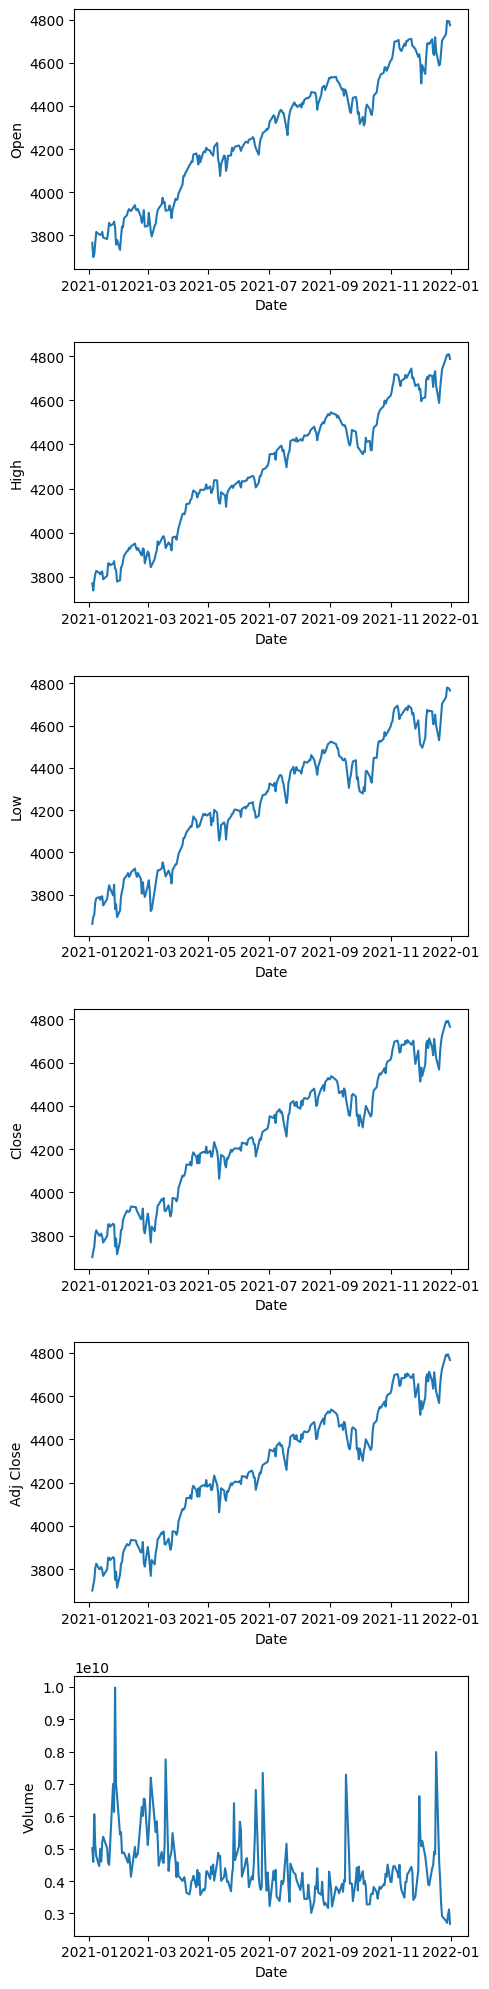

In [14]:
fig, axes = plt.subplots(len(data.columns.values), 1, figsize=(5, 20))

for idx, column in enumerate(data.columns.values):
    axes[idx].plot(data.loc[:, column])
    axes[idx].set(ylabel=column, xlabel="Date")
plt.tight_layout()
plt.show()

# Practice

- convert the code above to use .iloc instead of .loc


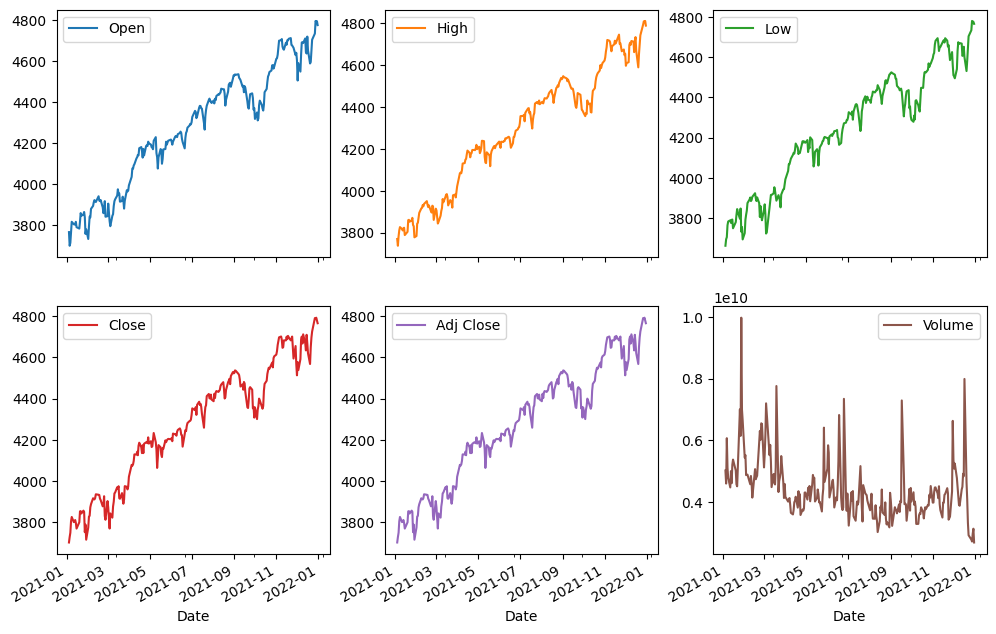

In [17]:
# bonus plot
data.plot(subplots=True, layout=(2, 3), figsize=(12, 8))
plt.show()

## More interesting stuff - calculating returns


In [13]:
# getting the necessary data

data = yf.download(["^GSPC", "WMT"], start="2010-01-01")[
    "Adj Close"
]  # downloads and stores the 'adjusted close' data for the s&p500 and walmart
data.columns = ["spy", "wmt"]  # renames the columns in the dataframe

data

[*********************100%%**********************]  2 of 2 completed


,spy,wmt
Date,,
2010-01-04,39.871311,1132.989990
2010-01-05,39.474304,1136.520020
2010-01-06,39.386078,1137.140015
2010-01-07,39.408146,1141.689941
2010-01-08,39.209625,1144.979980
...,...,...
2023-09-05,160.270004,4496.830078
2023-09-06,161.470001,4465.479980
2023-09-07,163.470001,4451.140137


In [14]:
returns_1 = data.pct_change().dropna(
    axis=0
)  # calculates the daily percent change (shown below), then removes all rows with NaN values
# 'axis = 0' refers to rows, while 'axis = 1' refers to columns
returns_1

,spy,wmt
Date,,
2010-01-05,-0.009957,0.003116
2010-01-06,-0.002235,0.000546
2010-01-07,0.000560,0.004001
2010-01-08,-0.005038,0.002882
2010-01-11,0.016501,0.001747
...,...,...
2023-09-05,-0.008046,-0.004194
2023-09-06,0.007487,-0.006972
2023-09-07,0.012386,-0.003211


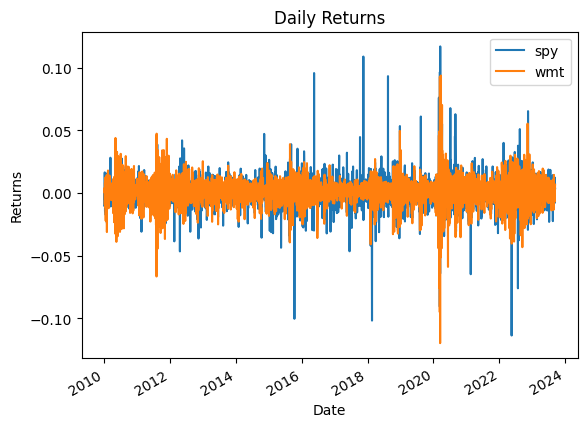

In [15]:
returns_1.plot(title="Daily Returns", ylabel="Returns")
plt.show()

In [16]:
(data.iloc[1, 0] / data.iloc[0, 0]) - 1

-0.009957209248925403

In [17]:
data.shift(1)

,spy,wmt
Date,,
2010-01-04,NaN,NaN
2010-01-05,39.871311,1132.989990
2010-01-06,39.474304,1136.520020
2010-01-07,39.386078,1137.140015
2010-01-08,39.408146,1141.689941
...,...,...
2023-09-05,161.570007,4515.770020
2023-09-06,160.270004,4496.830078
2023-09-07,161.470001,4465.479980


In [18]:
returns_2 = (data / data.shift(1)).dropna(
    axis=0
)  # does something similar to the cell above, however it does not subtract 1

returns_2

,spy,wmt
Date,,
2010-01-05,0.990043,1.003116
2010-01-06,0.997765,1.000546
2010-01-07,1.000560,1.004001
2010-01-08,0.994962,1.002882
2010-01-11,1.016501,1.001747
...,...,...
2023-09-05,0.991954,0.995806
2023-09-06,1.007487,0.993028
2023-09-07,1.012386,0.996789


In [19]:
# log_returns

log_rets = np.log((data / data.shift(1)).dropna(axis=0))  # calculates the log returns

log_rets

,spy,wmt
Date,,
2010-01-05,-0.010007,0.003111
2010-01-06,-0.002238,0.000545
2010-01-07,0.000560,0.003993
2010-01-08,-0.005050,0.002878
2010-01-11,0.016366,0.001745
...,...,...
2023-09-05,-0.008079,-0.004203
2023-09-06,0.007459,-0.006996
2023-09-07,0.012310,-0.003216


In [20]:
# cumulative returns

cum_returns_1 = (1 + returns_1).cumprod() - 1
cum_returns_2 = returns_2.cumprod() - 1

In [21]:
(data.iloc[-1, :] - data.iloc[0, :]) / data.iloc[0, :]

spy    3.121761
wmt    2.960723
dtype: float64

In [22]:
cum_returns_1.iloc[-1, :]

spy    3.121761
wmt    2.960723
Name: 2023-09-11 00:00:00, dtype: float64

In [23]:
cum_returns_2.iloc[-1, :]

spy    3.121761
wmt    2.960723
Name: 2023-09-11 00:00:00, dtype: float64

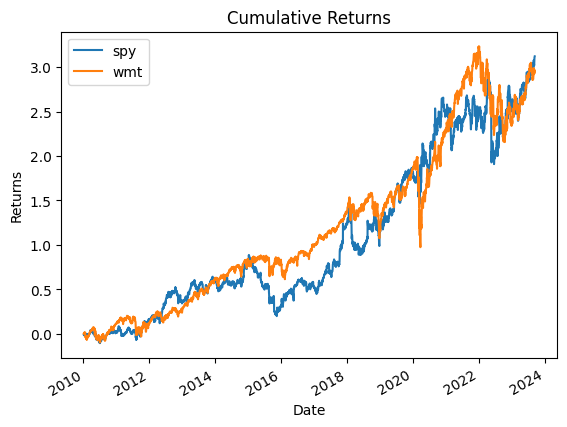

In [24]:
(cum_returns_1).plot(title="Cumulative Returns", ylabel="Returns")
plt.show()

In [25]:
# portfolio returns
W = np.array([0.4, 0.6])

portfolio_returns = W @ returns_1.T
cum_returns_1["portfolio"] = (1 + portfolio_returns).cumprod() - 1

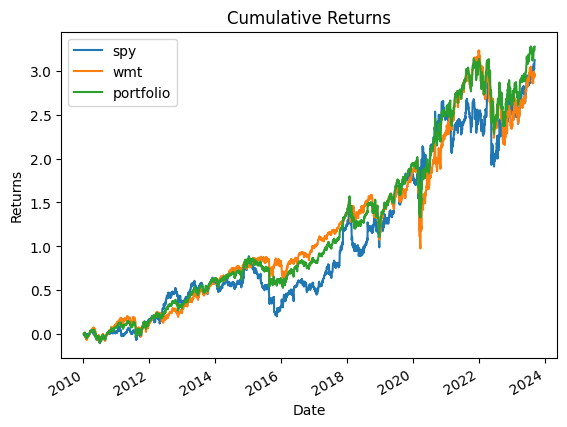

In [26]:
(cum_returns_1).plot(title="Cumulative Returns", ylabel="Returns")
plt.show()

In [30]:
returns_1

,spy,wmt
Date,,
2010-01-05,-0.009957,0.003116
2010-01-06,-0.002235,0.000546
2010-01-07,0.000560,0.004001
2010-01-08,-0.005038,0.002882
2010-01-11,0.016501,0.001747
...,...,...
2023-09-05,-0.008046,-0.004194
2023-09-06,0.007487,-0.006972
2023-09-07,0.012386,-0.003211


In [31]:
portfolio_returns

Date
2010-01-05   -0.002113
2010-01-06   -0.000567
2010-01-07    0.002625
2010-01-08   -0.000286
2010-01-11    0.007649
                ...   
2023-09-05   -0.005735
2023-09-06   -0.001188
2023-09-07    0.003028
2023-09-08    0.001590
2023-09-11    0.005426
Length: 3444, dtype: float64

In [34]:
round(0.4 * -0.009957 + 0.6 * 0.003116, 6)

-0.002113

# Returns Analysis


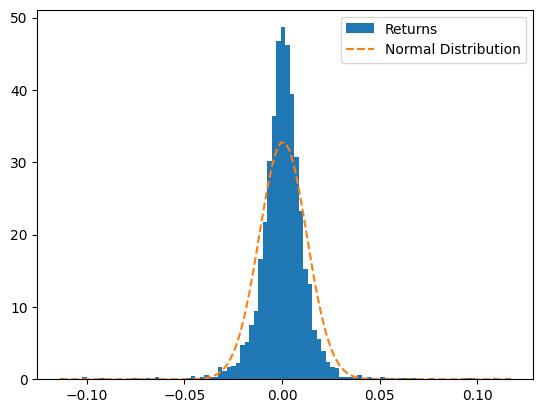

<Figure size 1200x800 with 0 Axes>

In [83]:
plot_returns_dist(returns=returns_1["spy"])

## Practice

- Do some independent analysis of the mean, std, skew, and kurtosis of the returns.


## Normality of returns?

- Jarque-Bera - tests whether the skewness and kurtosis matches that of the normal distribution
- Kolmogorov Smirnov test


In [38]:
_, pval = jarque_bera(returns_1["spy"])
pval

0.0

In [39]:
ks_1samp(returns_1["wmt"], stats.norm.cdf).pvalue

0.0

In [40]:
ks_2samp(returns_1["spy"], returns_1["spy"])

KstestResult(statistic=0.0, pvalue=1.0, statistic_location=-0.11375757862080915, statistic_sign=1)

In [41]:
ks_2samp(returns_1["spy"], returns_1["wmt"])

KstestResult(statistic=0.04878048780487805, pvalue=0.0005508561268551438, statistic_location=-0.0022790701204471464, statistic_sign=1)

In [42]:
spy = get_pdf(returns=returns_1["spy"])
wmt = get_pdf(returns=returns_1["wmt"])

jensenshannon(spy, wmt)

0.8224952530843608

<Axes: title={'center': 'Max Drawdown'}, xlabel='Date'>

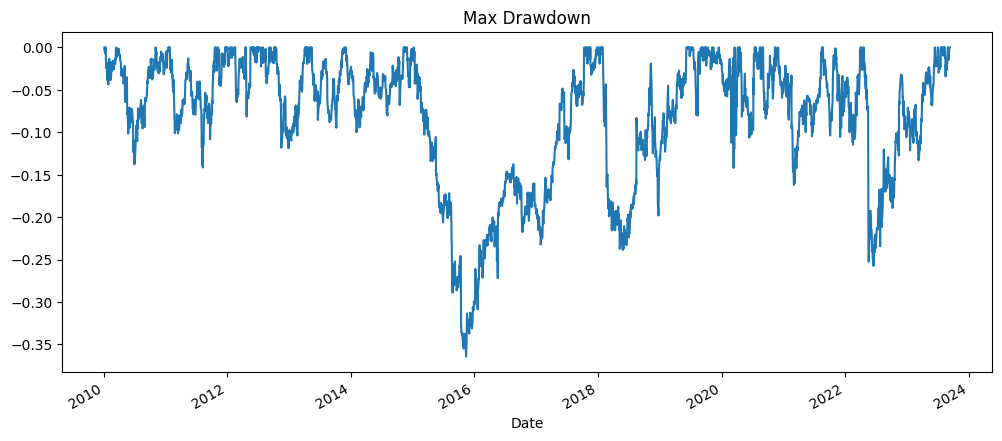

In [43]:
max_drawdown(returns=returns_1["spy"]).plot(figsize=(12, 5), title="Max Drawdown")

## Beta Calculation


In [44]:
X = returns_1.spy
y = returns_1.wmt
X = sm.add_constant(X)  # an intercept is not added by default, so it is up to the user to add it

model = sm.OLS(y, X)
reg = model.fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wmt   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     921.2
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.67e-179
Time:                        15:55:12   Log-Likelihood:                 11024.
No. Observations:                3444   AIC:                        -2.204e+04
Df Residuals:                    3442   BIC:                        -2.203e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.534      0.125   -7.17e-05       0.001
spy            0.4200      0.014     30.351      0.000       0.393       0.447
==============================================================================
Omnibus:                      658.773   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12533.981
Skew:                          -0.367   Prob(JB):                         0.00
Kurtosis:                      12.317   Cond. No.                         82.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
print(f"The beta of the stock is {round(reg.params[1], 3)}")

The beta of the stock is 0.42


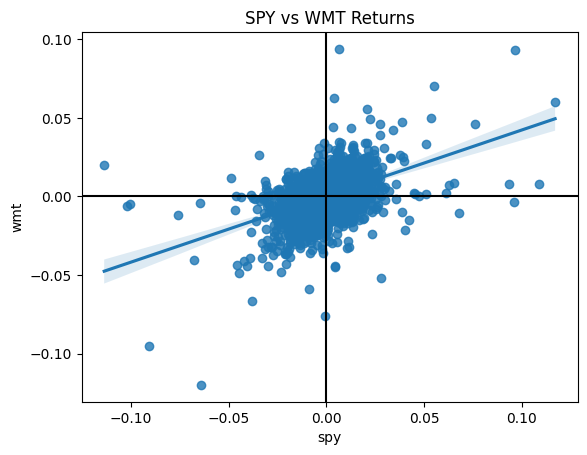

In [46]:
sns.regplot(x="spy", y="wmt", data=returns_1)  # ci=None to turn off confidence interval
plt.title("SPY vs WMT Returns")
plt.axvline(0, color="black")
plt.axhline(0, color="black")
plt.show()

# Practice

- use RollingOLS to calculate the rolling beta of a stock
- One step further, create a function that accepts a ticker and calculates the beta of that stock
- Another step further, can you implement the beta formula to see if there are any differences between the betas?
